Эмпирическая функция распределения на самом деле является более точной оценкой генеральной функции распределения, нежели просто состоятельная оценка значения в точке. А именно, имеет место теорема Гливенко-Кантелли:
$\sup_{x} |F (x) − \overline{F_n} (x)| → 0, n → ∞$

Доказывать подобного рода утверждения в нашем курсе времени нет, однако этот факт достаточно несложно увидеть прямым моделированием. Конечно, исследовать сходимость “почти наверное” моделированием не очень удобно, но мы можем хотя бы рассмотреть более слабую сходимость по вероятности, которая напрямую следует из сходимости “почти наверное”. А для установления сходимости по вероятности у нас есть удобныеинструменты: например, всевозможные неравенства, связывающие сходимость по вероятности со сходимостью выборочных характеристик. Итак, прямым моделированием покажите выполнение теоремы Гливенко-Кантелли (в “слабом смысле”: со сходимостью повероятности к нулю).

# Требования:
• Для сдачи домашнего задания используйте Google Colab/Github. Ожидается, что ноутбук будет выложен на Github/Colab (не файл .ipynb, присланный куда-либо).
• Для данного домашнего задания можно использовать языки программирования R, Python.
• Задания необходимо выполнять в RMarkdown либо Jupyter Notebook с комментариями и пояснениями.

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Шаг 1: 
Определение функции для расчёта эмпирической функции распределения (ЭФР)

In [69]:
def empirical_cdf(sample, x_range):
    # Для каждого x подсчитываем долю элементов выборки, которые меньше или равны x
    return np.array([np.mean(sample <= x) for x in x_range])

## Шаг 2:
Определение функции для расчёта истинной функции распределения (ФР)

In [70]:
def true_cdf(x_range, distribution):
    # Используем функцию распределения из scipy для данного распределения
    return np.array([distribution.cdf(x) for x in x_range])

## Шаг 3:
Определение функции для моделирования и визуализации сходимости ЭФР к ФР

In [71]:
def plot_convergence(sample_sizes, distribution, x_range):

    # Для каждого размера выборки
    for n in sample_sizes:
        plt.figure(figsize=(12, 8))
        plt.title('Сходимость ЭФР к ФР')

        # Генерация выборки
        sample = distribution.rvs(n)
        # Расчёт ЭФР
        ecdf = empirical_cdf(sample, x_range)
        # Расчёт ФР
        tcdf = true_cdf(x_range, distribution)
        # Вычисление супремума разности между ФР и ЭФР
        sup_diff = np.max(np.abs(tcdf - ecdf))

        # Выводим на графике ЭФР и ФР
        plt.step(x_range, ecdf, where='post', label=f'ЭФР для n={n}, sup. разн.={sup_diff:.3f}')
        # plt.plot(x_range, sup_diff, label=f'sup для n={n}', color='red')
        plt.plot(x_range, tcdf, label=f'ФР для n={n}', linestyle='--', color='red')
        plt.xlabel('x')
        plt.ylabel('F(x)')
        plt.legend()
        plt.show()


In [72]:
# Задаем параметры моделирования
sample_sizes = [10, 30, 100, 500, 1000, 10000]  # Различные размеры выборки
distribution = stats.norm()                                  # Стандартное нормальное распределение
x_range = np.linspace(-3, 3, 1000)                      # Диапазон значений x

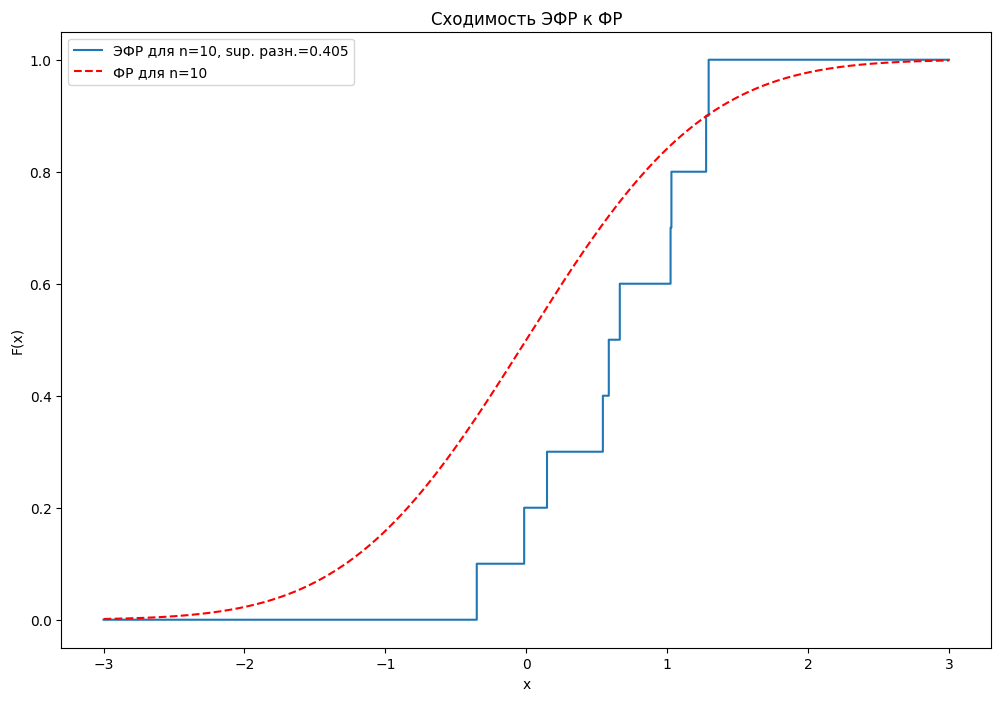

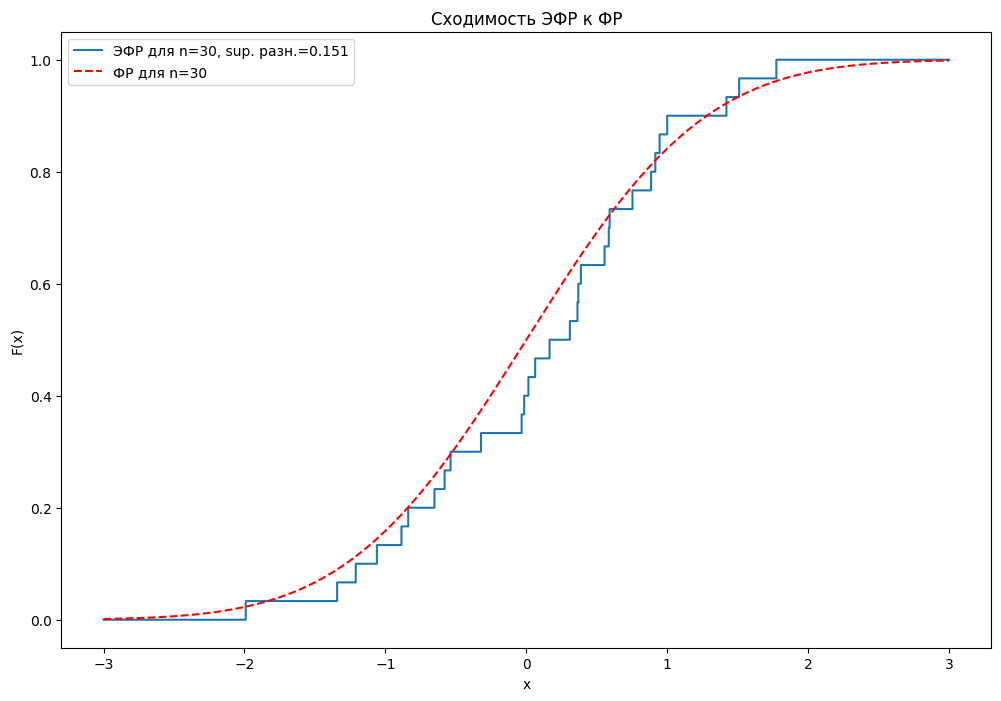

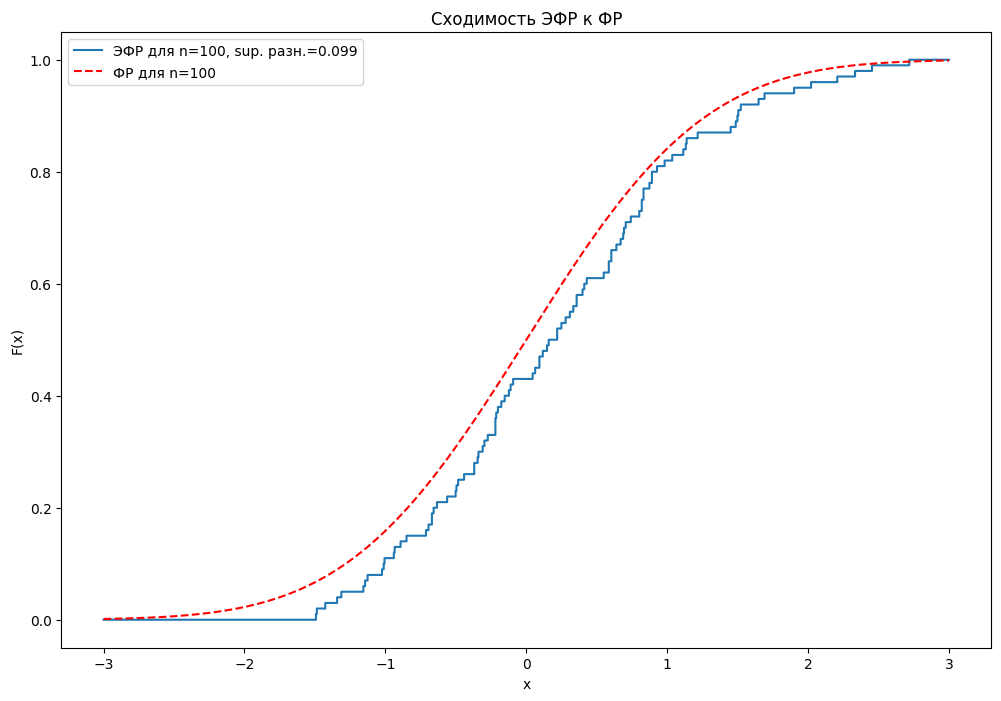

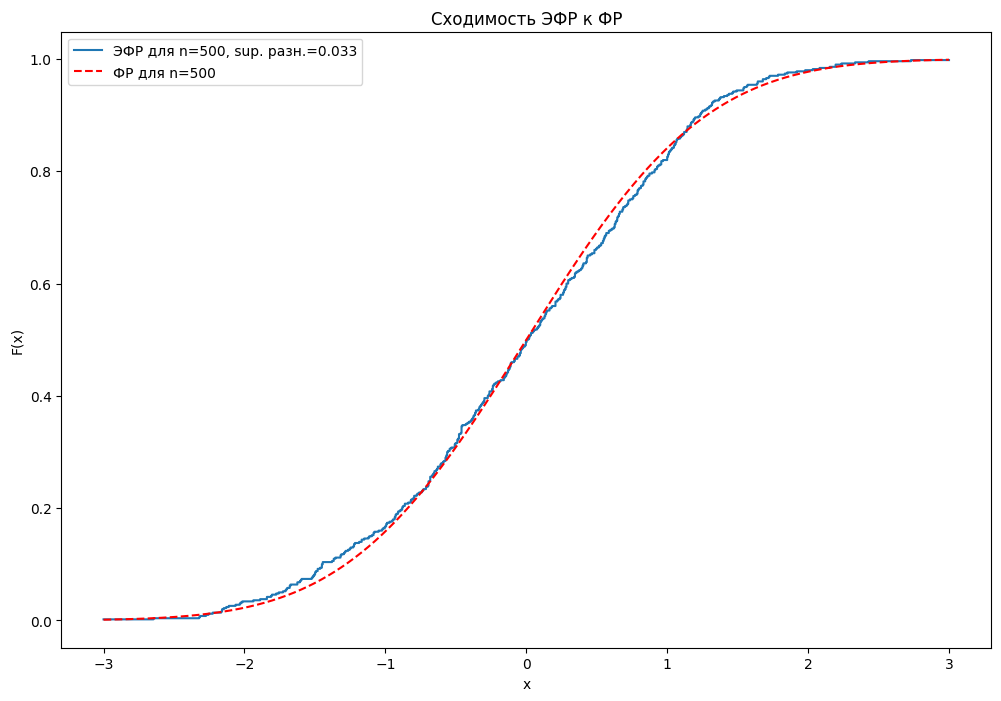

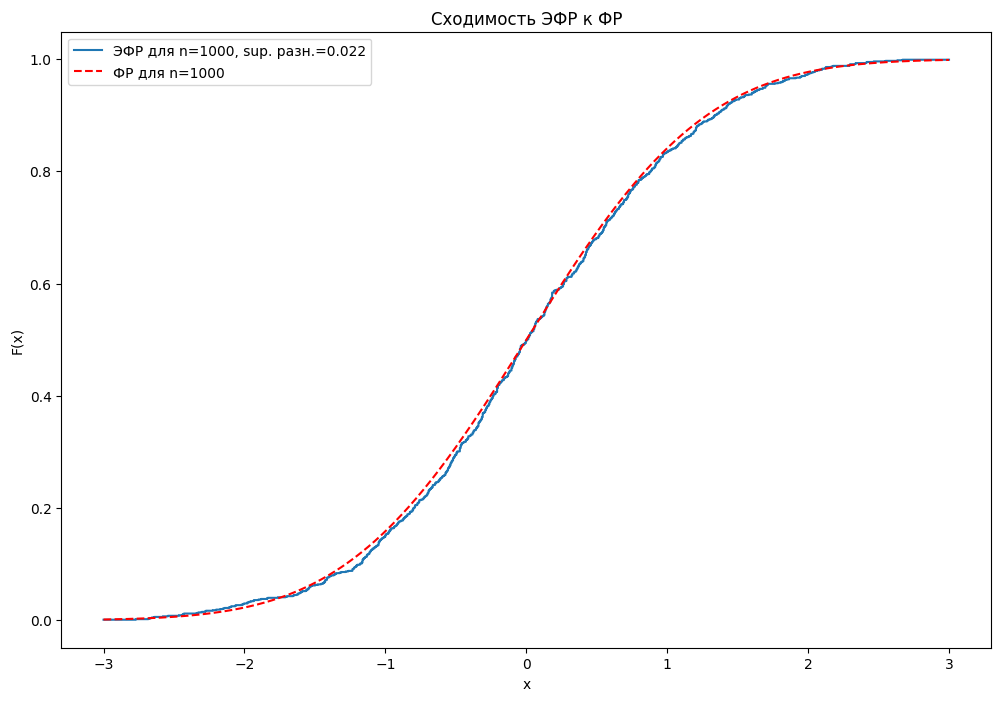

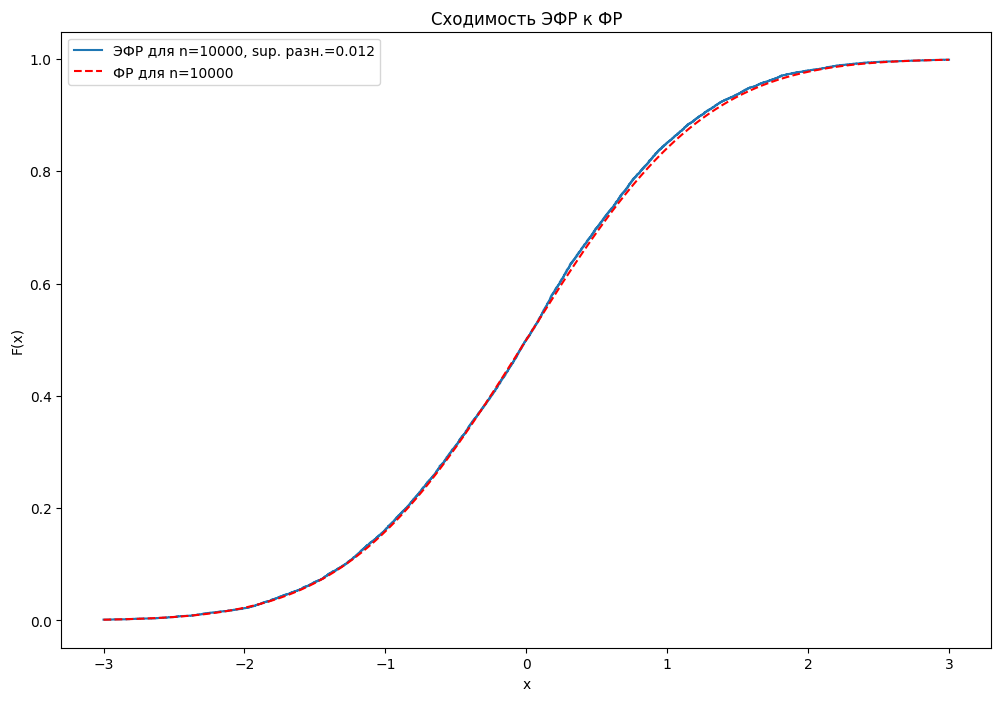

In [73]:
# Вызываем функцию для моделирования и визуализации
plot_convergence(sample_sizes, distribution, x_range)